# Gradient Boosting Classifier on DARKNET 2020: A Project Report

In [1]:
#importing python libraries
import numpy as np
import pandas as pd

In [2]:
#Reading the dataset: Darknet 2020
df = pd.read_csv('darknet.csv', error_bad_lines=False)
df.head(10)

b'Skipping line 328: expected 85 fields, saw 125\n'


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
5,10.152.152.11-173.194.65.127-54570-443-6,10.152.152.11,54570,173.194.65.127,443,6,24/07/2015 04:10:00 PM,421362,5,3,...,0,0,0,0,1.437765e+15,1.866111e+05,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
6,173.194.33.97-10.152.152.11-443-56254-6,173.194.33.97,443,10.152.152.11,56254,6,24/07/2015 04:09:45 PM,119682119,488,487,...,0,0,0,0,1.437765e+15,3.184630e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
7,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:09:46 PM,116996934,369,378,...,0,0,0,0,1.437765e+15,3.617028e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
8,74.125.28.189-10.152.152.11-443-44097-6,74.125.28.189,443,10.152.152.11,44097,6,24/07/2015 04:09:48 PM,100279453,61,60,...,0,0,0,0,1.437765e+15,3.327790e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
9,10.152.152.11-173.194.65.127-34702-19305-6,10.152.152.11,34702,173.194.65.127,19305,6,24/07/2015 04:10:00 PM,119962833,3638,3157,...,0,0,0,0,1.437765e+15,3.298254e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [3]:
#A look at all the 85 columns of the dataset
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [4]:
#Getting all the columns with total number of entries in each column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [5]:
#Correlation matrix to know the dependency of columns on each other
corr = df.corr()
corr.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Src Port,1.000000,-0.246451,-0.097384,0.065328,-0.036259,-0.014248,-0.019712,-0.008271,0.076486,-0.090022,...,-0.028619,0.138354,NaN,NaN,NaN,NaN,0.073311,0.058631,0.077870,0.031325
Dst Port,-0.246451,1.000000,-0.321199,0.039227,0.022094,0.014775,0.004451,0.010865,0.004448,-0.178715,...,0.014722,0.246275,NaN,NaN,NaN,NaN,0.069794,-0.000706,0.064385,0.060121
Protocol,-0.097384,-0.321199,1.000000,-0.266954,-0.034735,-0.026164,-0.023039,-0.020874,-0.195123,0.564044,...,-0.023370,-0.872467,NaN,NaN,NaN,NaN,-0.222855,-0.155843,-0.236588,-0.129431
Flow Duration,0.065328,0.039227,-0.266954,1.000000,0.142110,0.100288,0.072529,0.057008,0.340744,-0.068930,...,0.145455,0.240411,NaN,NaN,NaN,NaN,0.505336,0.127573,0.506074,0.409007
Total Fwd Packet,-0.036259,0.022094,-0.034735,0.142110,1.000000,0.744834,0.457391,0.635688,0.125575,-0.020982,...,0.698507,0.029652,NaN,NaN,NaN,NaN,0.066400,-0.017736,0.062264,0.074038


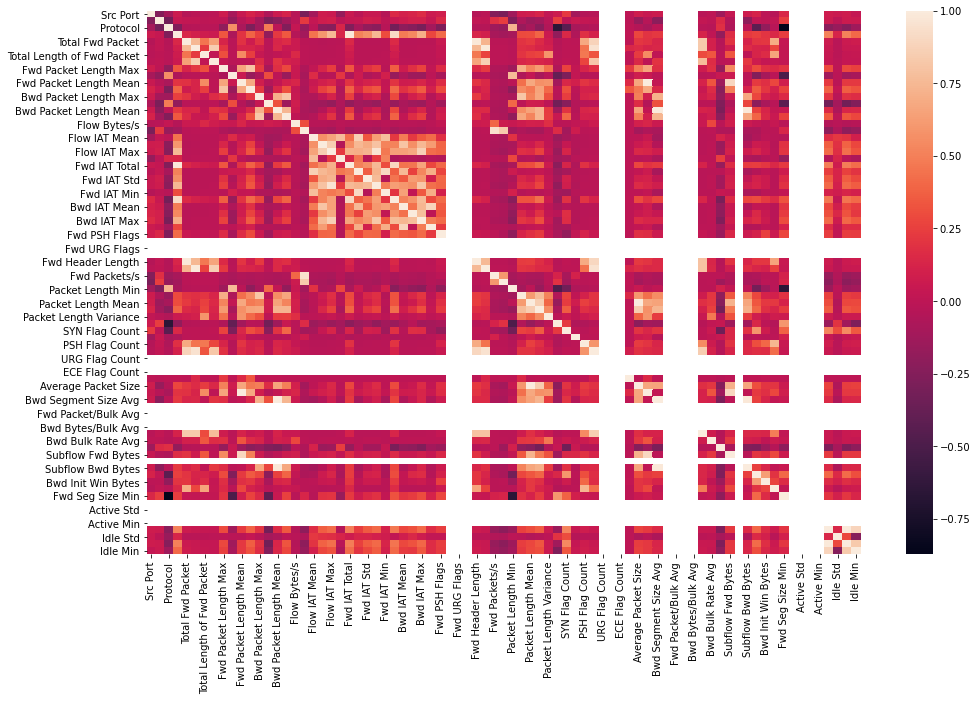

In [6]:
#Correlation matrix in the form of heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

sns.heatmap(corr)
plt.show()

# Data Cleaning Stage:

In this stage, I will be performing data cleaning like dealing with missing values,inf values,changing the columns like splitting columns if required. So when all the columns that may cause error further due to their datatype or format or problematic values will be rectified and then we can proceed towards data preprocessing stage.

In [7]:
df.dropna() #dropping null values

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [8]:
df.isnull().sum().head() #to check the number of null values in each column

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
dtype: int64

In [9]:
df['Label'].value_counts()  #to check the number of classes in Label

Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: Label, dtype: int64

In [10]:
df['Label.1'].value_counts() #to check the number of classes in Label

P2P                48520
Browsing           32808
Audio-Streaming    16580
Chat               11478
File-Transfer      11098
Video-Streaming     9486
Email               6145
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: Label.1, dtype: int64

In [11]:
#splitting the Src IP into octets,getting first two ocets
newIP = []
for value in df['Src IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]
#     print(octet2)
    newIP.append(float(octet1 + '.' + octet2))

    

In [12]:
df1 = pd.DataFrame(newIP)  #a new dataframe with the above obtained series
df1.head()

,0
0,10.152
1,10.152
2,10.152
3,10.152
4,10.152


In [13]:
df['Src IP'] = df1  #replacing column Src IP with df1
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [14]:
newIP1 = [] #splitting the Dst IP into octets,getting first two ocets
for value in df['Dst IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]
    
#     print(octet2)
    newIP1.append(float(octet1 + '.' + octet2))

In [15]:
df2 = pd.DataFrame(newIP1)
df2.head()

,0
0,216.580
1,216.580
2,216.580
3,74.125
4,173.194


In [16]:
df['Dst IP'] = df2
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


# Data Preprocessing:Encoding,Sampling,Normalisation

In [17]:
# label encoding the data : Label and Label.1
from sklearn.preprocessing import LabelEncoder 
  
Le = LabelEncoder() 
  
df['Label']= Le.fit_transform(df['Label'])
df['Label.1']= Le.fit_transform(df['Label.1'])


In [18]:
df.head()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,0,0


In [19]:
df5=df.drop(['Flow ID','Timestamp'], axis = 1) #dropping the unnecessary columns
df5.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,0,0




In the next 4 steps, i will be performing some operations on the below columns to convert it from exponential values to normal float values.



In [20]:
df5['Idle Mean']=df5['Idle Mean']/1e15

In [21]:
df5['Idle Max']=df5['Idle Max']/1e15

In [22]:
df5['Idle Min']=df5['Idle Min']/1e15

In [23]:
df5['Idle Std']=df5['Idle Std']/1e7

In [24]:
df5.head(5)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437765,0.311772,1.437765,1.437765,0,0


In [25]:
df5.isnull().values.any() 

True

In [26]:
df5.fillna(df5.mean()).head(5) #filling null values with the mean of the column

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437765,0.311772,1.437765,1.437765,0,0


In [27]:
df5.notnull().values.all() #this shows there are no more null values



False

In [28]:
df5=df5.astype(float)



Below is an attempt to find the index of the maximum value in each column. In this way I will come to know if there is inf in any column and if it is there then what is the row number.
These values will then be removed so that there is no error during normalisation.



In [29]:
# find the index position of maximun 
# values in every column 
maxValueIndex = df5.idxmax() 
  
print("Maximum values of columns are at row index position :") 
print(maxValueIndex) 

Maximum values of columns are at row index position :
Src IP       58156
Src Port    109235
Dst IP       94335
Dst Port     43964
Protocol       263
             ...  
Idle Std     26454
Idle Max    117799
Idle Min     33850
Label       118611
Label.1     113067
Length: 83, dtype: int64


In [30]:
# Replacing infinite with nan 
df5.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df5.dropna(inplace=True) 

In [31]:
df5.head(5)


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,0.0,0.0,0.0,0.0,1.437765,0.311772,1.437765,1.437765,0.0,0.0


# Sampling :Oversampling and Undersampling


Sampling is used to balance the data i.e to balance the number of each class in the Label.
Oversampling: to increase the number of minority classes
Undersampling: to decease the number of majority classes


In [32]:
df5['Label'].value_counts()

0.0    93309
1.0    23861
3.0    22919
2.0     1392
Name: Label, dtype: int64

So the data is highly imbalanced.....


Now I will undersample class 0.0 wrt class 1.0 and
oversample class 3.0 wrt class 2.0


In [33]:
#1. Find the number of the minority class
non_tor = len(df5[df5['Label']==0])
non_vpn = len(df5[df5['Label']==1])
vpn = len(df5[df5['Label']==2])
tor = len(df5[df5['Label']==3])

print(non_tor)
print(non_vpn)
print(vpn)
print(tor)

93309
23861
1392
22919


In [34]:
index_non_tor = df5[df5['Label']==0].index
index_non_vpn = df5[df5['Label']==1].index
index_tor = df5[df5['Label']==2].index
index_vpn = df5[df5['Label']==3].index

In [35]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_non_tor,non_vpn,replace='False')

In [36]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_non_vpn,random_indices])



Below is the undersampled dataset: under_sample_df



In [37]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = df5.iloc[under_sample_indices]
under_sample_df.head()


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
93403,131.202,64717.0,131.202,13000.0,6.0,81.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0
93404,131.202,42530.0,178.237,443.0,6.0,119829241.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982862e-08,1.0,3.0
93405,131.202,42534.0,178.237,443.0,6.0,119828205.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982767e-08,1.0,3.0
93406,131.202,17208.0,77.720,11113.0,17.0,138272.0,2.0,2.0,126.0,85.0,...,0.0,0.0,0.0,0.0,1.430326,9.762882e-03,1.430326,1.430326e+00,1.0,3.0
93407,8.600,0.0,8.000,0.0,0.0,5103.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0


In [38]:
under_sample_df['Label'].value_counts()

0.0    23856
1.0    23817
2.0       49
Name: Label, dtype: int64

In [39]:
vpn_sample = df5[df5['Label']==2].sample(tor, replace=True)

In [40]:
#create a new dataframe containing only tor data
df_tor = df5[df5['Label']==3]


Over sampled dataset:over_sample_df


In [41]:
over_sample_df = pd.concat([vpn_sample,df_tor], axis=0)

In [42]:
over_sample_class_counts=pd.value_counts(over_sample_df['Label'])

In [43]:
over_sample_class_counts

3.0    22919
2.0    22919
Name: Label, dtype: int64

Below is the balanced dataset.
The number of class values of each class is same


In [44]:
balance_df = pd.concat([under_sample_df,over_sample_df], axis=0)


In [45]:
balance_df['Label'].value_counts()

0.0    23856
1.0    23817
2.0    22968
3.0    22919
Name: Label, dtype: int64

In [46]:
balance_df.head()


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
93403,131.202,64717.0,131.202,13000.0,6.0,81.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0
93404,131.202,42530.0,178.237,443.0,6.0,119829241.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982862e-08,1.0,3.0
93405,131.202,42534.0,178.237,443.0,6.0,119828205.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982767e-08,1.0,3.0
93406,131.202,17208.0,77.720,11113.0,17.0,138272.0,2.0,2.0,126.0,85.0,...,0.0,0.0,0.0,0.0,1.430326,9.762882e-03,1.430326,1.430326e+00,1.0,3.0
93407,8.600,0.0,8.000,0.0,0.0,5103.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0


In [47]:
#Forming a new dataframe for the target variable and removing it from the above dataset.
target = balance_df.filter(['Label'], axis=1)
target.head()

,Label
93403,1.0
93404,1.0
93405,1.0
93406,1.0
93407,1.0


In [48]:
balance_df = balance_df.drop('Label', 1)
balance_df.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
93403,131.202,64717.0,131.202,13000.0,6.0,81.0,2.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,3.0
93404,131.202,42530.0,178.237,443.0,6.0,119829241.0,5.0,3.0,24.0,0.0,...,20.0,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982862e-08,3.0
93405,131.202,42534.0,178.237,443.0,6.0,119828205.0,5.0,3.0,24.0,0.0,...,20.0,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982767e-08,3.0
93406,131.202,17208.0,77.720,11113.0,17.0,138272.0,2.0,2.0,126.0,85.0,...,8.0,0.0,0.0,0.0,0.0,1.430326,9.762882e-03,1.430326,1.430326e+00,3.0
93407,8.600,0.0,8.000,0.0,0.0,5103.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,3.0



Now I will be normalising all the values of the dataset.
This is necessary for the consistency of the values of the dataset.
I will be using MinMaxScaler for normalisation.
So all the values will be converted into values between 0 to 1.


In [49]:
#MinMaxScaling

import pandas as pd
from sklearn import preprocessing

x = balance_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_final = pd.DataFrame(x_scaled,columns = balance_df.columns)
df_final.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
0,0.587586,0.987533,0.512169,0.198367,0.352941,6.666667e-07,0.000004,0.000000,0.000000e+00,0.000000e+00,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.3
1,0.587586,0.648976,0.697131,0.006760,0.352941,9.985770e-01,0.000017,0.000006,3.119689e-08,0.000000e+00,...,0.454545,0.0,0.0,0.0,0.0,0.841788,5.249502e-01,0.982086,2.048083e-08,0.3
2,0.587586,0.649037,0.697131,0.006760,0.352941,9.985684e-01,0.000017,0.000006,3.119689e-08,0.000000e+00,...,0.454545,0.0,0.0,0.0,0.0,0.841788,5.249502e-01,0.982086,2.048017e-08,0.3
3,0.587586,0.262581,0.301854,0.169574,1.000000,1.152258e-03,0.000004,0.000004,1.637837e-07,1.267845e-07,...,0.181818,0.0,0.0,0.0,0.0,0.982086,9.480039e-11,0.982086,9.820856e-01,0.3
4,0.038515,0.000000,0.027684,0.000000,0.000000,4.251667e-05,0.000004,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.3


In [50]:
corr1 = df_final.corr()
corr1.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
Src IP,1.000000,-0.309315,-0.108166,0.258446,0.051416,0.077953,0.204089,0.105901,0.176310,0.029133,...,0.015657,NaN,NaN,NaN,NaN,-0.073054,-0.041909,-0.076220,-0.052260,0.273968
Src Port,-0.309315,1.000000,0.424938,-0.375407,0.074730,-0.128717,-0.213713,-0.125044,-0.183706,-0.030633,...,0.050394,NaN,NaN,NaN,NaN,-0.069608,-0.010162,-0.071246,-0.077989,-0.083079
Dst IP,-0.108166,0.424938,1.000000,-0.435076,0.274767,-0.059092,-0.119831,-0.035972,-0.104920,0.010861,...,-0.143122,NaN,NaN,NaN,NaN,-0.167529,-0.026491,-0.167844,-0.153935,-0.075950
Dst Port,0.258446,-0.375407,-0.435076,1.000000,-0.263518,0.122175,0.166310,0.087913,0.135842,0.024800,...,0.191407,NaN,NaN,NaN,NaN,0.164288,0.036461,0.164156,0.145116,0.292827
Protocol,0.051416,0.074730,0.274767,-0.263518,1.000000,-0.459122,-0.186389,-0.168671,-0.151896,-0.084296,...,-0.800393,NaN,NaN,NaN,NaN,-0.524956,-0.076749,-0.524211,-0.480824,-0.239896



Getting a correlation matrix and a heatmap for all the columns of the final pre processed matrix which is ready to be fit into a model.


# Feature Selection

In [52]:
columns = np.full((corr1.shape[0],), True, dtype=bool)
for i in range(corr1.shape[0]):
    for j in range(i+1, corr1.shape[0]):
        if corr1.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_final.columns[columns]
dataset_final = df_final[selected_columns]

In [53]:
dataset_final.shape

(93560, 62)

# Model Training Phase


                    
This phase includes:
•	Splitting into training and testing data
•	Defining the model: Gradient Boosting Classifier
•	Performing baseline tuning in the model on test dataset: Getting evaluation metrics
•	Performing Hyperparameter Tuning using 10 fold Cross Validation: Getting the best parameters
•	Testing the Tuned model on test dataset: Getting evaluation metrics
•	Comparing the models before and after tuning.

                    

In [54]:
#train_test_split
from sklearn.model_selection import train_test_split

y=target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [72]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc=gbc.fit(x_train, y_train.values.ravel())
    y_pred_gbc=gbc.predict(x_test)
    f1_gbc = f1_score(y_test, y_pred_gbc,average='micro')
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbc.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbc.score(x_test, y_test)))
    print('F1-score: {}'.format(np.round(f1_gbc,4)))

Learning rate:  0.05
Accuracy score (training): 0.772
Accuracy score (validation): 0.775
F1-score: 0.7745
Learning rate:  0.075
Accuracy score (training): 0.787
Accuracy score (validation): 0.790
F1-score: 0.7897
Learning rate:  0.1
Accuracy score (training): 0.803
Accuracy score (validation): 0.807
F1-score: 0.8069
Learning rate:  0.25
Accuracy score (training): 0.876
Accuracy score (validation): 0.880
F1-score: 0.8799
Learning rate:  0.5
Accuracy score (training): 0.918
Accuracy score (validation): 0.918
F1-score: 0.9184
Learning rate:  0.75
Accuracy score (training): 0.948
Accuracy score (validation): 0.947
F1-score: 0.9468
Learning rate:  1
Accuracy score (training): 0.947
Accuracy score (validation): 0.947
F1-score: 0.9468


In [74]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# making predictions with the Light Gradient Boosting classifier
lr_list = [0.01, 0.75, 1]

for learning_rate in lr_list:
    lgbm = LGBMClassifier(boosting_type='dart',max_depth=3, learning_rate=learning_rate, n_estimators=200,random_state=45)
    lgbm = lgbm.fit(x_train, y_train.values.ravel())
    y_pred_lgbm = lgbm.predict(x_test)

    f1_lgbm = f1_score(y_test, y_pred_lgbm,average='micro')
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(lgbm.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(lgbm.score(x_test, y_test)))
    print('F1-score: {}'.format(np.round(f1_lgbm,4)))


Learning rate:  0.01
Accuracy score (training): 0.970
Accuracy score (validation): 0.971
F1-score: 0.9708
Learning rate:  0.75
Accuracy score (training): 0.767
Accuracy score (validation): 0.772
F1-score: 0.7716
Learning rate:  1
Accuracy score (training): 0.545
Accuracy score (validation): 0.550
F1-score: 0.5498


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# making predictions with the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42,max_depth=5)
dtc = dtc.fit(x_train, y_train.values.ravel())
y_pred_dtc = dtc.predict(x_test)
print('Accuracy of the DTC on test set: {:.3f}'.format(dtc.score(x_test, y_test)))
print(classification_report(y_test, y_pred_dtc))


# making predictions with the k nearest neighbour model
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn= knn.fit(x_train, y_train.values.ravel())
y_pred_knn = knn.predict(x_test)
print('Accuracy of the KNN on test set: {:.3f}'.format(knn.score(x_test, y_test)))
print(classification_report(y_test, y_pred_knn))


# making predictions with the random forest model
rfc = RandomForestClassifier(n_estimators=200,max_depth=5)
rfc = rfc.fit(x_train, y_train.values.ravel())
y_pred_rfc = rfc.predict(x_test)
print('Accuracy of the Random Forest on test set: {:.3f}'.format(rfc.score(x_test, y_test)))
print(classification_report(y_test, y_pred_rfc))


# evaluating the models based on their f-1 scores
f1_dtc = f1_score(y_test, y_pred_dtc,average='micro')
f1_knn = f1_score(y_test, y_pred_knn,average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc,average='micro')

# print the f-1 scores
print('F1-score of decision tree classifier: {}'.format(np.round(f1_dtc,4)))
print('F1-score of k nearest neighbour: {}'.format(np.round(f1_knn,4)))
print('F1-score of random forest classifier: {}'.format(np.round(f1_rfc,4)))

Accuracy of the DTC on test set: 0.959
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      7204
         1.0       0.88      0.98      0.93      7096
         2.0       0.98      0.87      0.92      7040
         3.0       1.00      0.99      1.00      6728

    accuracy                           0.96     28068
   macro avg       0.96      0.96      0.96     28068
weighted avg       0.96      0.96      0.96     28068

Accuracy of the KNN on test set: 0.900
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      7204
         1.0       0.89      0.86      0.87      7096
         2.0       0.94      1.00      0.97      7040
         3.0       0.88      0.83      0.85      6728

    accuracy                           0.90     28068
   macro avg       0.90      0.90      0.90     28068
weighted avg       0.90      0.90      0.90     28068

Accuracy of the Random Forest on test set: 0.920
   

In [56]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,pred)
print(cf_matrix)

[[7203    0    1    0]
 [   0 7068   28    0]
 [   0   15 7025    0]
 [   0    2    1 6725]]


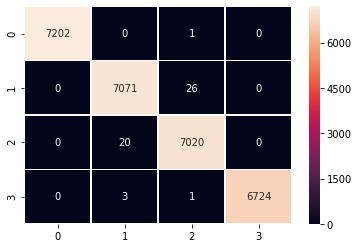

In [103]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt="d", linewidths=.5)

In [63]:
# import voting classifier
from sklearn.ensemble import VotingClassifier

# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42,max_depth=8)),
                  ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)),
                  ('rfc', RandomForestClassifier(n_estimators=200,max_depth=8))], 
    voting='hard')

# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42,max_depth=8)),
                  ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)),
                  ('rfc',RandomForestClassifier(n_estimators=200,max_depth=8))], 
    voting='soft')

# make predictions with the hard voting model
voting_classifier_hard.fit(x_train, y_train.values.ravel())
y_pred_vch = voting_classifier_hard.predict(x_test)

# make predictions with the soft voting model
voting_classifier_soft.fit(x_train, y_train.values.ravel())
y_pred_vcs = voting_classifier_soft.predict(x_test)

# evaluate both models with the f-1 score
f1_vch = f1_score(y_test, y_pred_vch,average='micro')
f1_vcs = f1_score(y_test, y_pred_vcs,average='micro')

# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

F1-score of the hard voting classifier: 0.9916
F1-score of the soft voting classifier: 0.9947


In [74]:
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

VCH_accuracies = cross_val_score(estimator = voting_classifier_hard, X = x_train, y = y_train.values.ravel(), cv = cv)
print("Mean_Acc_VotingHard : ", VCH_accuracies.mean())

VCS_accuracies = cross_val_score(estimator = voting_classifier_soft, X = x_train, y = y_train.values.ravel(), cv = cv)
print("Mean_Acc_VotingSoft : ", VCS_accuracies.mean())

Mean_Acc_VotingHard :  0.9709583562084532
Mean_Acc_VotingSoft :  0.9886856241673165


# Hyperparameter Tuning

In [64]:
#Performing HyperParameter Tuning:Learning rate,n_estimators_max_depth (using 5 fold Grid search CV)
from sklearn.model_selection import GridSearchCV


params= {'knn__n_neighbors':[5,10,8], 'rfc__n_estimators':[100,200,300],'rfc__max_depth':[5,8,10]}

tuning = GridSearchCV(estimator=voting_classifier_hard, param_grid=params, cv=5,verbose=3)
tuning.fit(x_train,y_train.values.ravel())

print('The best Parameters are:',tuning.best_params_)
print('The best score is:',tuning.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100; total time=  16.7s
[CV 2/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100; total time=  15.9s
[CV 3/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100; total time=  16.5s
[CV 4/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100; total time=  15.4s
[CV 5/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=100; total time=  18.8s
[CV 1/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200; total time=  25.2s
[CV 2/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200; total time=  22.1s
[CV 3/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200; total time=  22.6s
[CV 4/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200; total time=  20.5s
[CV 5/5] END knn__n_neighbors=5, rfc__max_depth=5, rfc__n_estimators=200; total time=  20.4s
[CV 1/5]

[CV 3/5] END knn__n_neighbors=10, rfc__max_depth=10, rfc__n_estimators=300; total time=  32.9s
[CV 4/5] END knn__n_neighbors=10, rfc__max_depth=10, rfc__n_estimators=300; total time=  31.1s
[CV 5/5] END knn__n_neighbors=10, rfc__max_depth=10, rfc__n_estimators=300; total time=  31.2s
[CV 1/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estimators=100; total time=  17.5s
[CV 2/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estimators=100; total time=  19.1s
[CV 3/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estimators=100; total time=  18.7s
[CV 4/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estimators=100; total time=  17.7s
[CV 5/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estimators=100; total time=  16.2s
[CV 1/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estimators=200; total time=  21.7s
[CV 2/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estimators=200; total time=  21.6s
[CV 3/5] END knn__n_neighbors=8, rfc__max_depth=5, rfc__n_estima

So the best parameters are:
'knn_n_neighbors':5
 'rfc__max_depth': 10
 'rfc__n_estimators': 200
 

 


In [65]:
#Performing HyperParameter Tuning:n_neighbors,n_estimators,_max_depth (using 5 fold Grid search CV)
from sklearn.model_selection import GridSearchCV


params= {'knn__n_neighbors':[5,8,10], 'rfc__n_estimators':[100,200,300],'rfc__max_depth':[5,8,10]}

tuning = GridSearchCV(estimator=voting_classifier_soft, param_grid=params, cv=5,verbose=0)
tuning.fit(x_train,y_train.values.ravel())

print('The best Parameters are:',tuning.best_params_)
print('The best score is:',tuning.best_score_)

The best Parameters are: {'knn__n_neighbors': 5, 'rfc__max_depth': 10, 'rfc__n_estimators': 300}
The best score is: 0.9962896427386536


In [132]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix1 = confusion_matrix(y_test,pred)
print(cf_matrix1)

[[7203    0    0    0]
 [   0 7089    8    0]
 [   0    0 7040    0]
 [   0    0    0 6728]]


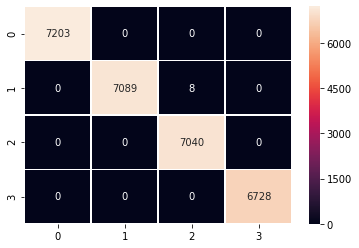

In [133]:
import seaborn as sns
sns.heatmap(cf_matrix1, annot=True, fmt="d", linewidths=.5)

# Result

So for Voting Classifier on Darknet2020, while predicting Label, the best accuracy obtained is 99.62%.